<a href="https://colab.research.google.com/github/ZBourrouett/Challenge_Store/blob/main/Challenge_TelecomX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extracción

In [127]:
import requests
import pandas as pd
import json

In [128]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = json.loads(response.text)
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [129]:
df[df['customerID'] == '7295-EXSMO']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
5341,7295-EXSMO,,Female,1,No,No,3,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9


#Transformación

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [131]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [132]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
df[df['account.Charges.Total'].isna()]


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [135]:
df = df[df['account.Charges.Total'].notna()]

In [136]:
print(df['customer.gender'].unique())
print(df['Churn'].unique())
print(df['phone.MultipleLines'].unique())
print(df['internet.InternetService'].unique())
print(df['internet.OnlineBackup'].unique())
print(df['internet.DeviceProtection'].unique())
print(df['internet.TechSupport'].unique())
print(df['internet.StreamingTV'].unique())
print(df['internet.StreamingMovies'].unique())

['Female' 'Male']
['No' 'Yes' '']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']


In [137]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()

/tmp/ipython-input-137-1594411447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [138]:
df.sample(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
2996,4159-NAAIX,No,Female,0,No,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,3.248333
6327,8707-RMEZH,No,Female,1,Yes,No,69,Yes,No,Fiber optic,...,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,2.910000
6350,8735-IJJEG,No,Male,0,Yes,No,14,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),50.20,668.85,1.673333


In [139]:
df.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'customer.tenure': 'MesesCliente',
    'phone.PhoneService': 'ServicioTelefonico',
    'phone.MultipleLines': 'MultiplesLineas',
    'internet.InternetService': 'TipoInternet',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingPeliculas',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturacionElectronica',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargosMensuales',
    'account.Charges.Total': 'CargosTotales',
    'Cuentas_Diarias': 'CargosDiarios'
}, inplace=True)

/tmp/ipython-input-139-2208019183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [140]:
espacios_vacios = df['Churn'].apply(lambda x: str(x).strip() == '').sum()
print(f"Cantidad de valores vacíos en 'Churn': {espacios_vacios}")

Cantidad de valores vacíos en 'Churn': 224


In [141]:
import numpy as np
df['Churn'] = df['Churn'].apply(lambda x: np.nan if str(x).strip() == '' else x)
print(f"Nulos en 'Churn' después de reemplazo: {df['Churn'].isnull().sum()}")


Nulos en 'Churn' después de reemplazo: 224


/tmp/ipython-input-141-2562807734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].apply(lambda x: np.nan if str(x).strip() == '' else x)


In [142]:
df = df[df['Churn'].notnull()]

In [143]:
binarias = [col for col in df.columns if df[col].dropna().nunique() == 2 and set(df[col].dropna().unique()) <= {'Yes', 'No'}]
print("Columnas binarias:", binarias)


Columnas binarias: ['Churn', 'TienePareja', 'TieneDependientes', 'ServicioTelefonico', 'FacturacionElectronica']


In [144]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df['TienePareja'] = df['TienePareja'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df['TieneDependientes'] = df['TieneDependientes'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df['ServicioTelefonico'] = df['ServicioTelefonico'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df['FacturacionElectronica'] = df['FacturacionElectronica'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df.sample(3)

/tmp/ipython-input-144-1583104237.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
/tmp/ipython-input-144-1583104237.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TienePareja'] = df['TienePareja'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
/tmp/ipython-input-144-1583104237.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `r

,customerID,Churn,Genero,AdultoMayor,TienePareja,TieneDependientes,MesesCliente,ServicioTelefonico,MultiplesLineas,TipoInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturacionElectronica,MetodoPago,CargosMensuales,CargosTotales,CargosDiarios
192,0303-UNCIP,0,Male,0,0,0,41,1,Yes,DSL,...,Yes,No,No,Yes,One year,0,Mailed check,65.00,2531.8,2.166667
7050,9710-NJERN,0,Female,0,0,0,39,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.15,826.0,0.671667
5894,8058-DMYRU,0,Male,1,0,0,54,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,90.05,4931.8,3.001667


#Carga y Análisis

In [145]:
df.describe()

,Churn,AdultoMayor,TienePareja,TieneDependientes,MesesCliente,ServicioTelefonico,FacturacionElectronica,CargosMensuales,CargosTotales,CargosDiarios
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

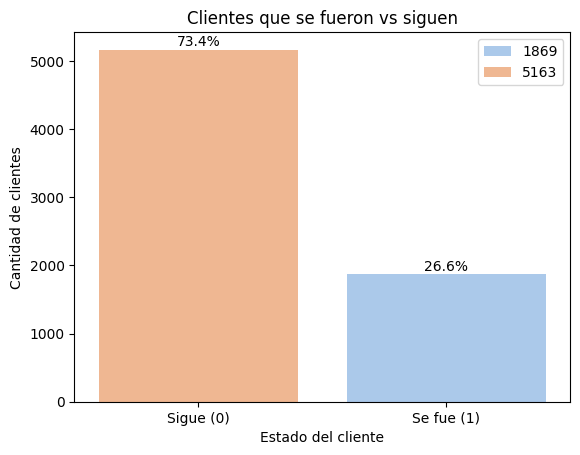

In [147]:
churn_counts = df['Churn'].value_counts().sort_index()

labels = ['Sigue (0)','Se fue (1)']

ax = sns.barplot(x=labels,hue=churn_counts.values, y=churn_counts.values, palette='pastel')
total = sum(churn_counts.values)
porcentajes = [f'{(v/total)*100:.1f}%' for v in churn_counts.values]
for i, (value, pct) in enumerate(zip(churn_counts.values, porcentajes)):
    ax.text(i, value + total*0.001, pct, ha='center', va='bottom', fontsize=10)
plt.title('Clientes que se fueron vs siguen')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Estado del cliente')
plt.savefig("Clientes que se fueron vs los que siguen", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [148]:
churn_counts

,count
Churn,
0,5163
1,1869


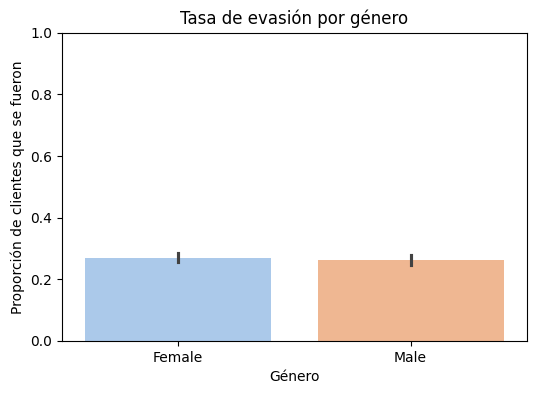

In [149]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Genero', y='Churn',hue='Genero', data=df, estimator='mean', palette='pastel')

plt.title('Tasa de evasión por género')
plt.ylabel('Proporción de clientes que se fueron')
plt.xlabel('Género')
plt.ylim(0, 1)

plt.savefig("Tasa de evasión por genero.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [150]:
# Tabla de frecuencia
pd.crosstab(df['Genero'], df['Churn'], normalize='index') * 100


Churn,0,1
Genero,,
Female,73.040482,26.959518
Male,73.795435,26.204565


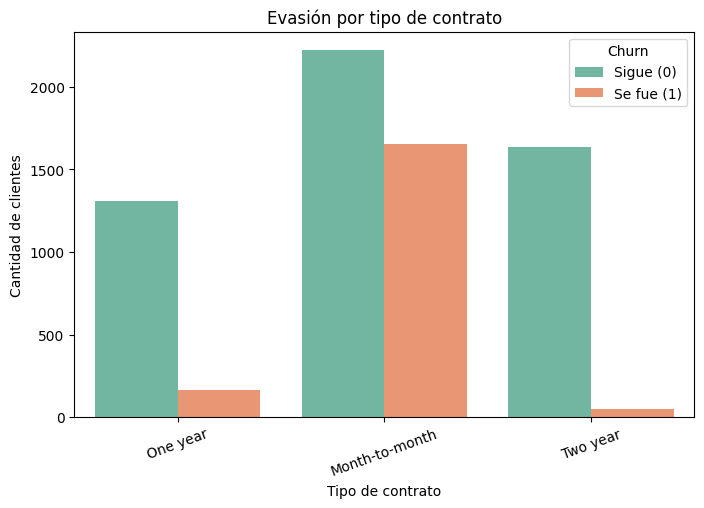

In [151]:

plt.figure(figsize=(8, 5))
sns.countplot(x='TipoContrato', hue='Churn',data=df, palette='Set2')
plt.title('Evasión por tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Tipo de contrato')
plt.xticks(rotation=20)
plt.legend(title='Churn', labels=['Sigue (0)','Se fue (1)'])
plt.show()

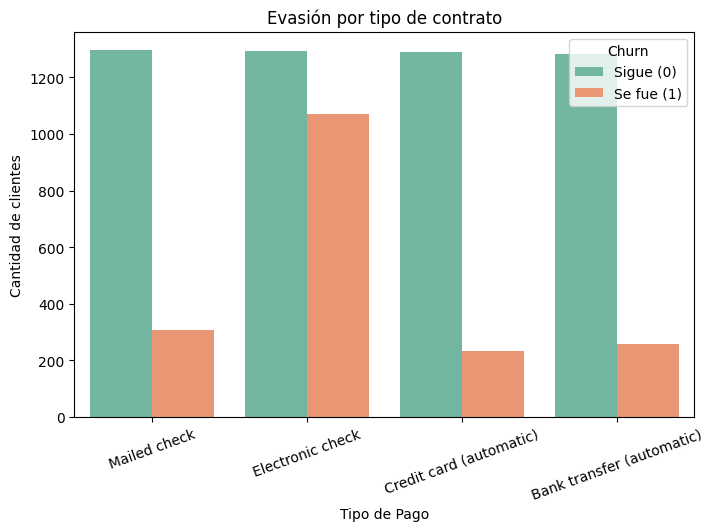

In [152]:

plt.figure(figsize=(8, 5))
sns.countplot(x='MetodoPago', hue='Churn',data=df, palette='Set2')
plt.title('Evasión por tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Tipo de Pago')
plt.xticks(rotation=20)
plt.legend(title='Churn', labels=['Sigue (0)','Se fue (1)'])
plt.show()

In [153]:
categorias = ['TipoContrato', 'MetodoPago', 'TipoInternet', 'TienePareja']
for col in categorias:
  plt.figure(figsize=(8, 5))
  sns.countplot(x=col, hue='Churn',data=df, palette='Set2')
  plt.title(f'Evasión por {col}')
  plt.ylabel('Cantidad de clientes')
  plt.xlabel(col)
  plt.xticks(rotation=20)
  plt.legend(title='Churn', labels=['Sigue (0)','Se fue (1)'])
  plt.savefig(f"churn_{col}.png", dpi=300, bbox_inches='tight')
  plt.close()

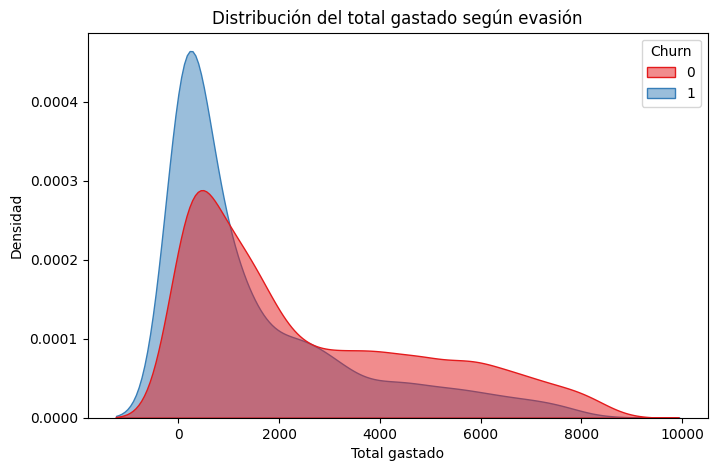

In [154]:

plt.figure(figsize=(8, 5))
sns.kdeplot(x='CargosTotales', hue='Churn',data=df, fill=True, common_norm=False, palette='Set1', alpha=0.5)
plt.title('Distribución del total gastado según evasión')
plt.xlabel('Total gastado')
plt.ylabel('Densidad')

plt.savefig("Distribución del total gastado según evasión.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

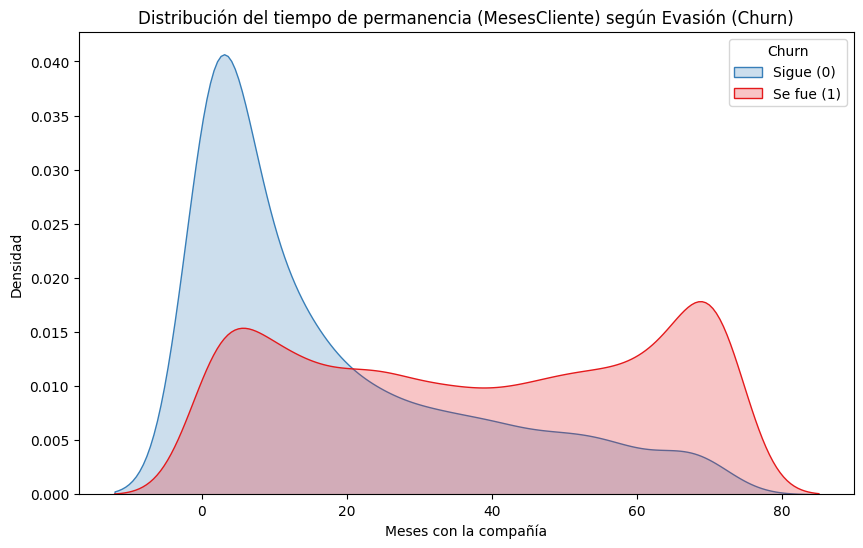

In [155]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MesesCliente', hue='Churn', common_norm=False, fill=True, palette='Set1')
plt.title('Distribución del tiempo de permanencia (MesesCliente) según Evasión (Churn)')
plt.xlabel('Meses con la compañía')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['Sigue (0)','Se fue (1)'])

plt.savefig("Distribución de permanencia según evasión.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [156]:
conteo_churn = df[df['Churn'] == 0]['MesesCliente'].value_counts().sort_index()
print(conteo_churn)


MesesCliente
1     233
2     115
3     106
4      93
5      69
     ... 
68     91
69     87
70    108
71    164
72    356
Name: count, Length: 72, dtype: int64


#Informe final

In [157]:
from PIL import Image

In [166]:
Porcentaje_de_abandono = Image.open("Clientes que se fueron vs los que siguen.png")
Tasa_evasion_por_genero = Image.open("Tasa de evasión por genero.png")
Tipo_de_contrato = Image.open("churn_TipoContrato.png")
Tipo_de_pago = Image.open("churn_MetodoPago.png")
Tipo_de_internet = Image.open("churn_TipoInternet.png")
Tiene_pareja = Image.open("churn_TienePareja.png")
Total_gastado = Image.open("Distribución del total gastado según evasión.png")
Permanencia_DR = Image.open("Distribución de permanencia según evasión.png")

## Intro:
Este análisis tiene como objetvo principal comprender los factores que influyen en la evasión de clientes 'Churn'.

## Limpieza y Tratamiento de Datos
Los datos se importaron de una API y seaplicaron las siguentes formas de limpieza: \


*   Conversión de varibales como TotalCharges a tipo numérico.
*   Tratamiento de valores nulos que podrían afectar al análisis.


*   Se agregó una columna con los gastos diarios.
*   Se cambió la forma de presentar los datos de algunas columnas para un mejor tratamiento matemático. (se cambió "si" por 1 y "No" por 0)






## Conclusión

El 26.6% de los clientes cancelan su contrato. \
No se encuentran diferencias significativas por genero y abandono.

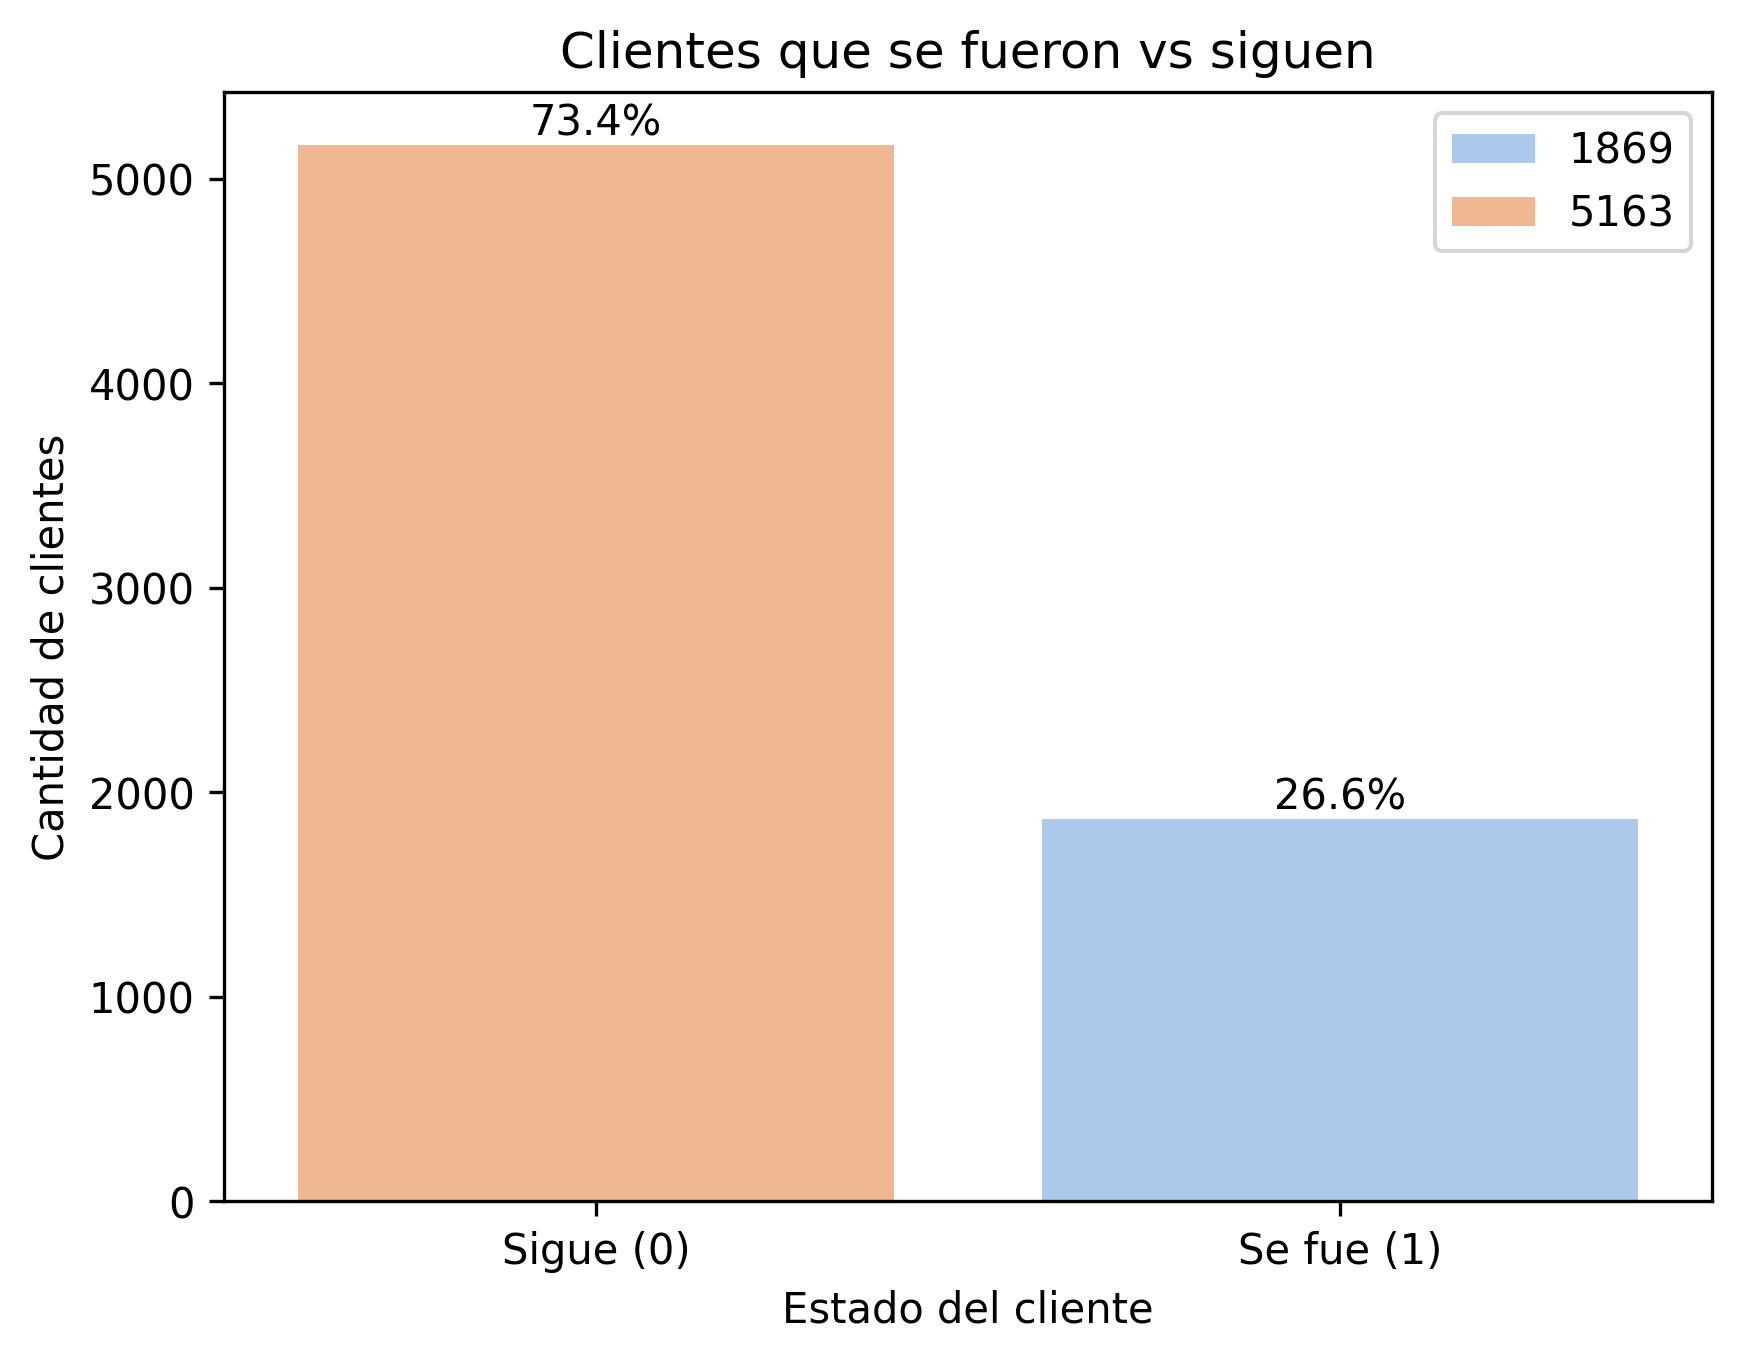

In [162]:
Porcentaje_de_abandono

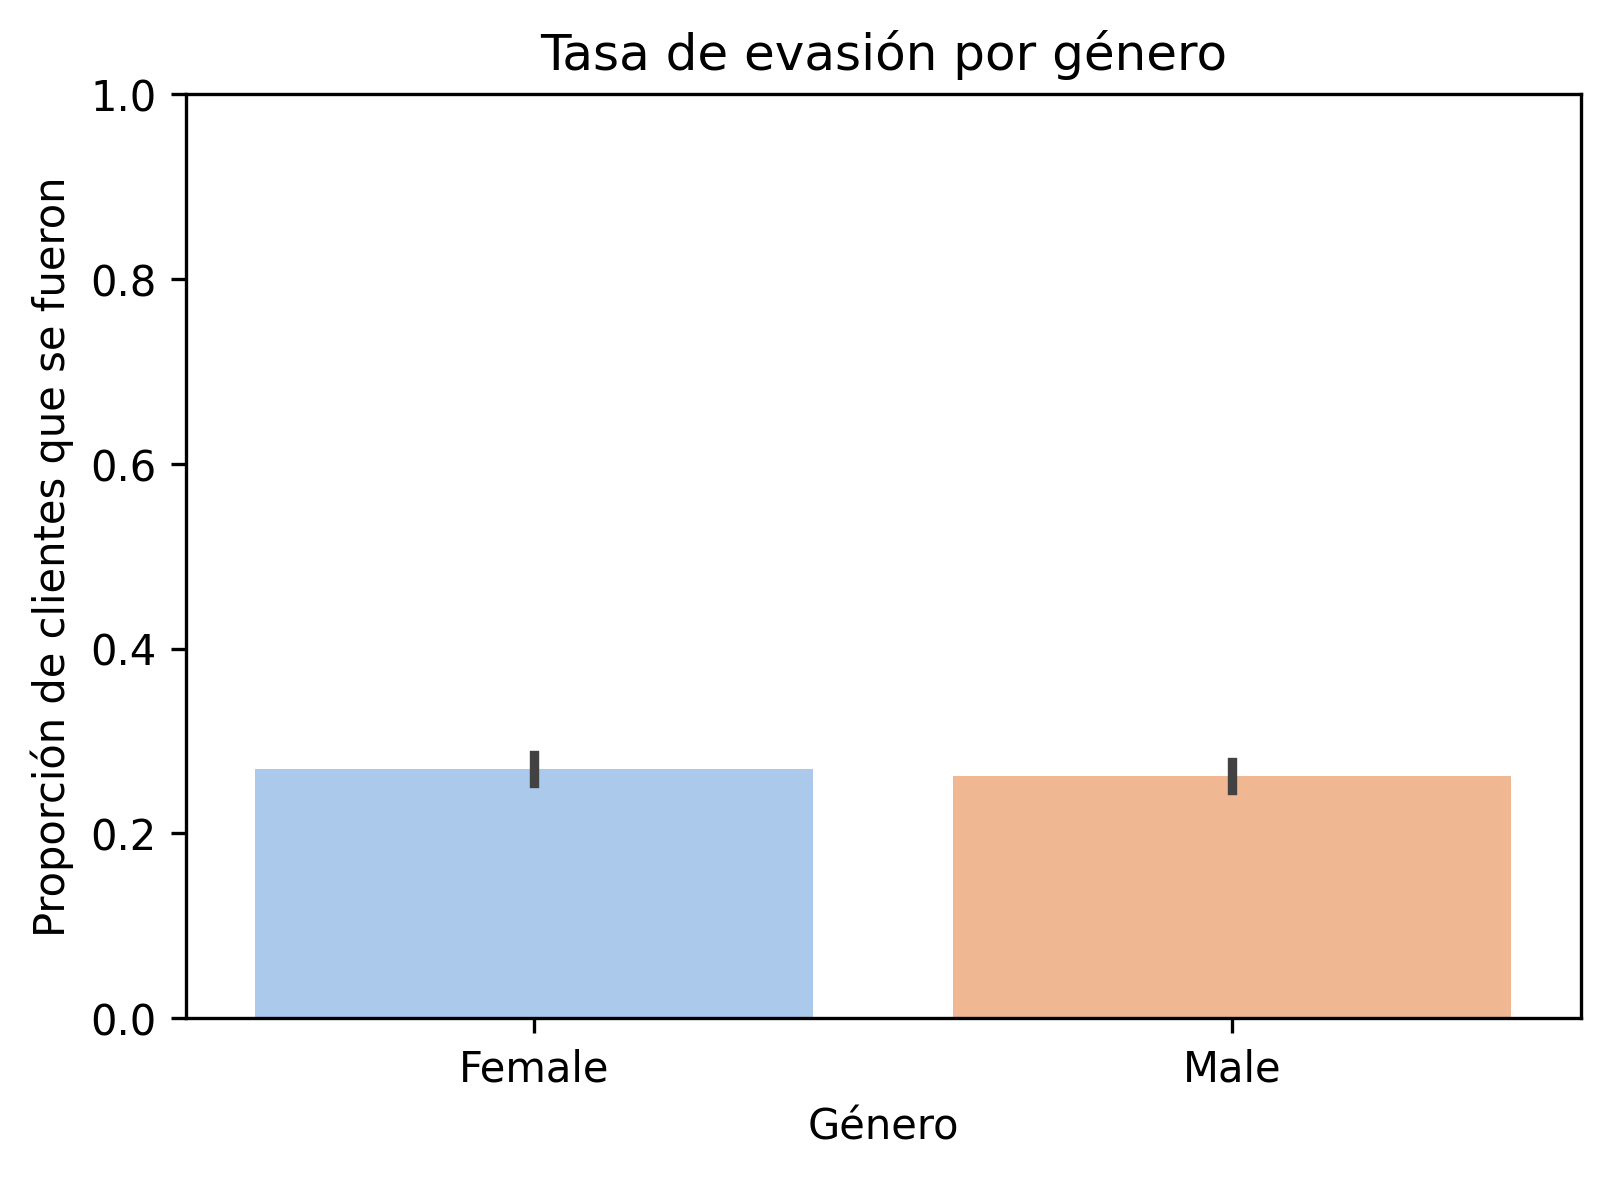

In [163]:
Tasa_evasion_por_genero

Los clientes con mayor permanencia tienden a abandonar más.

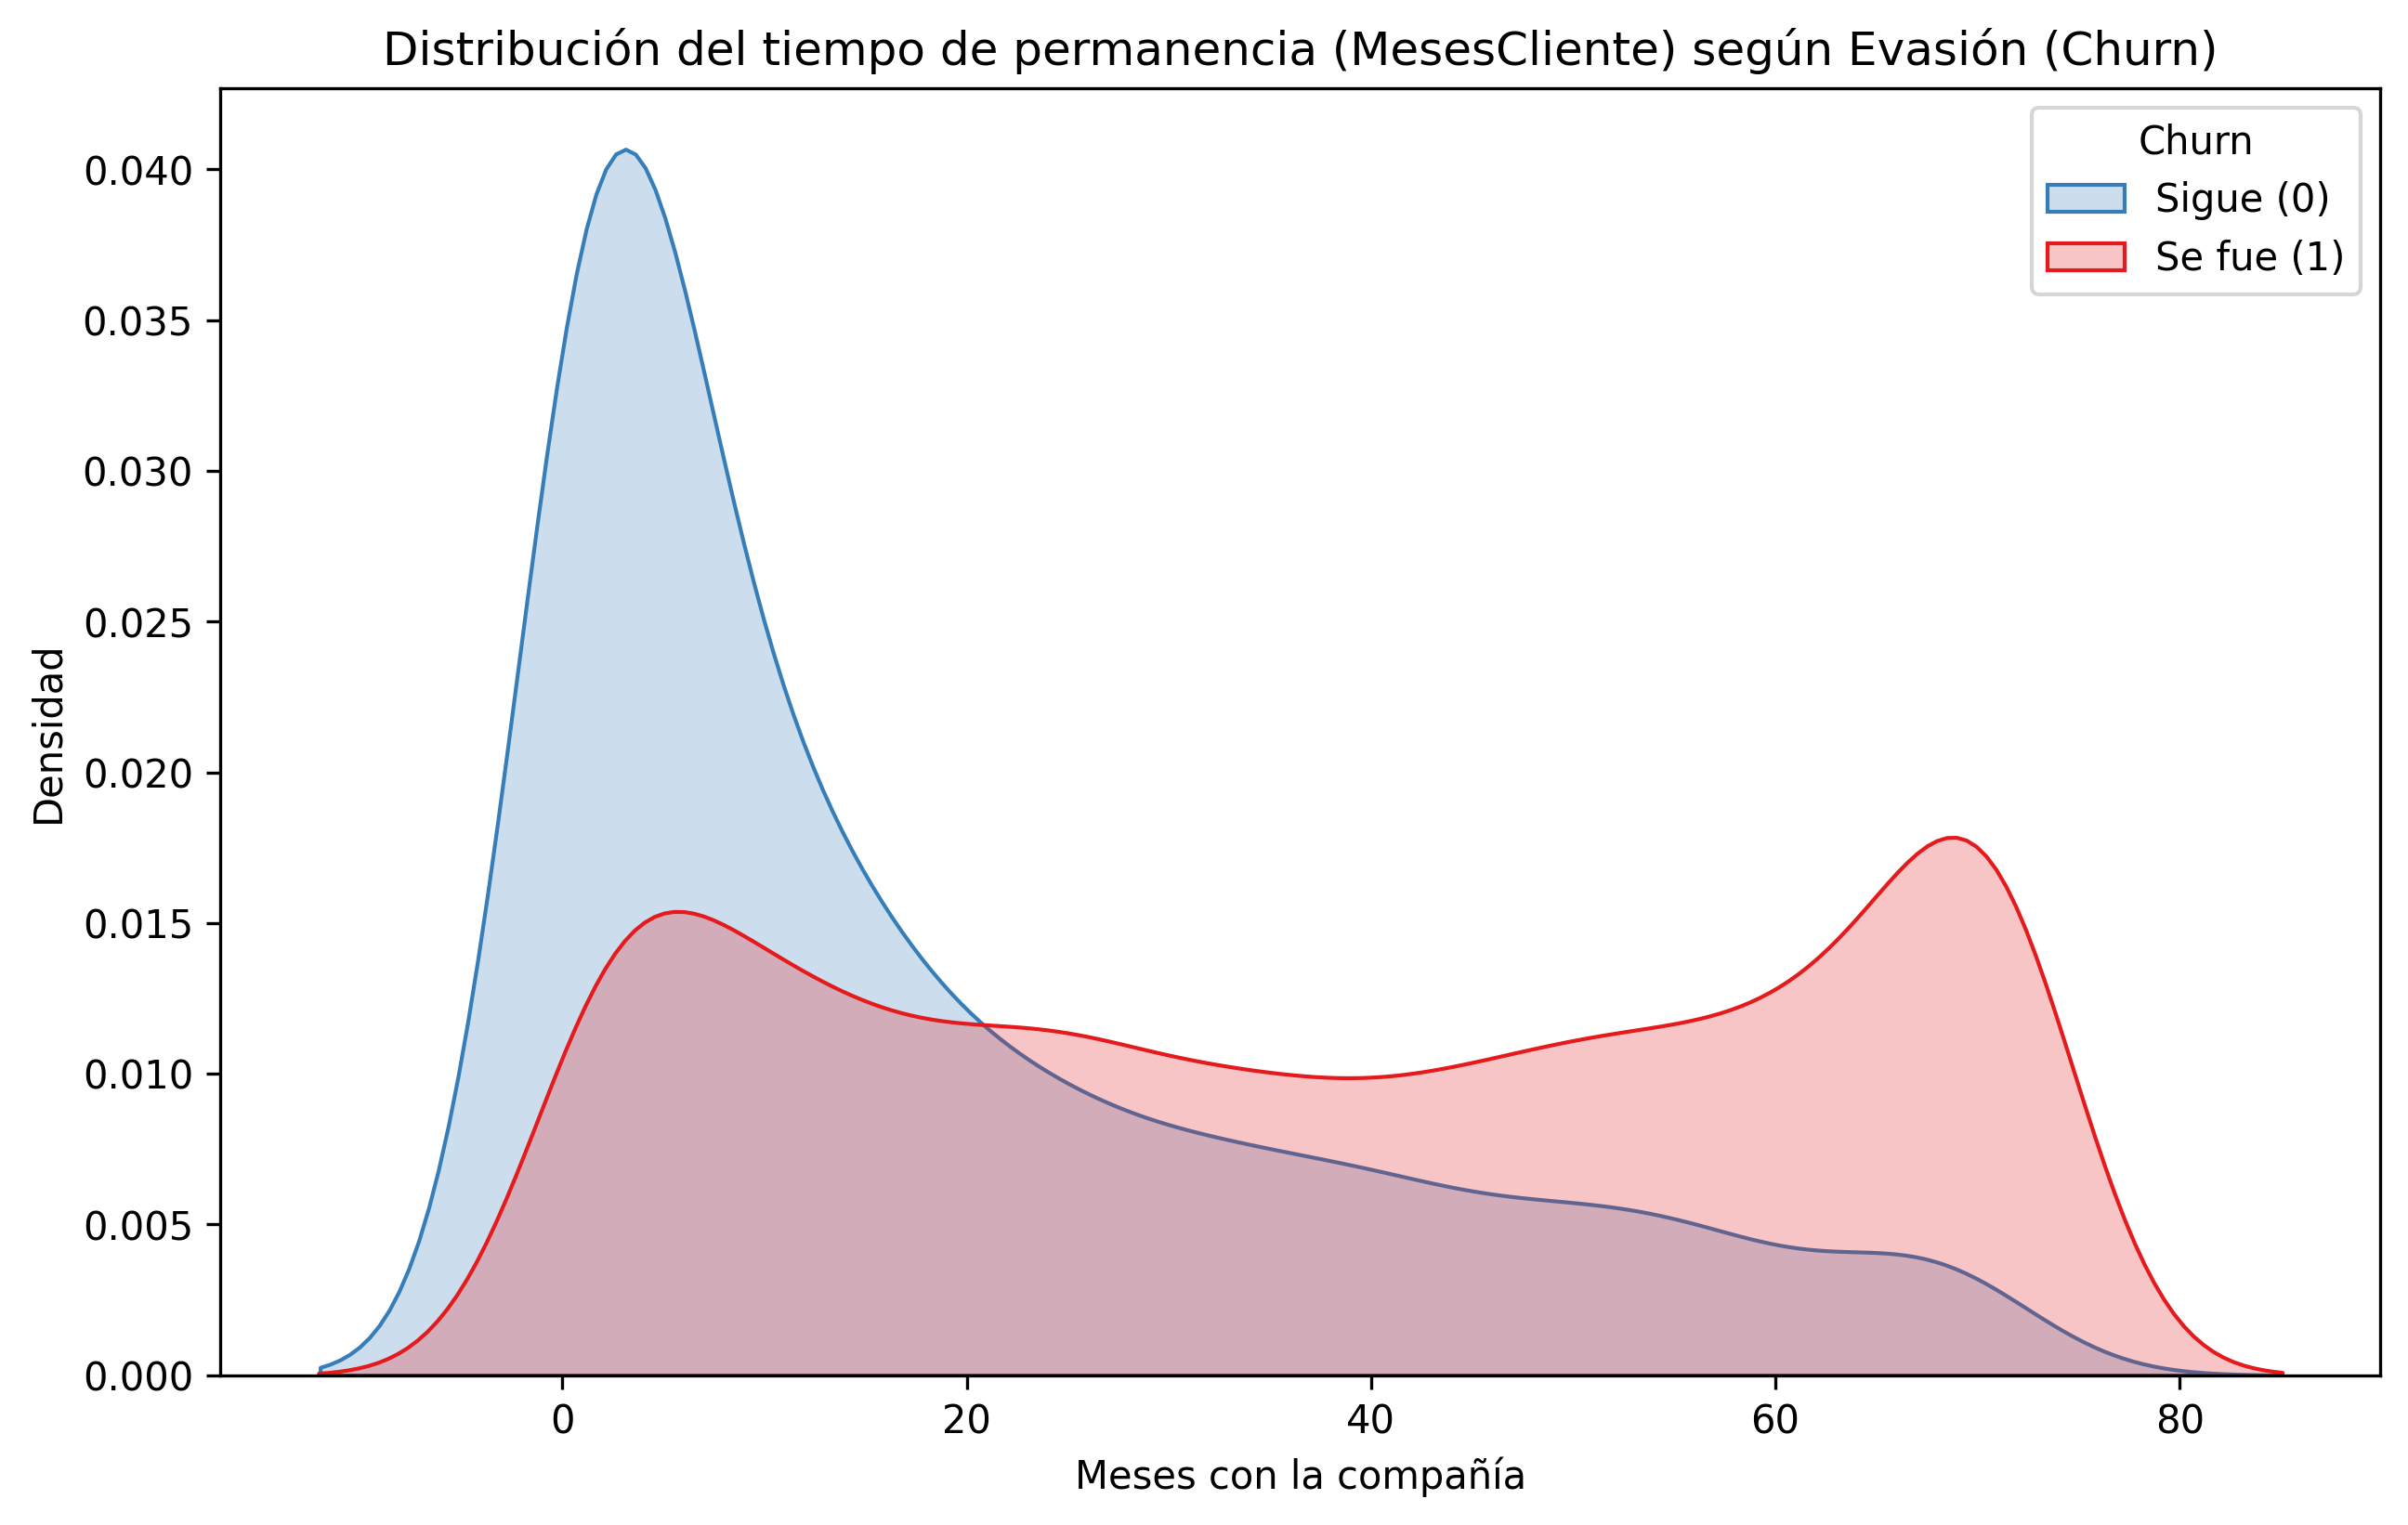

In [167]:
Permanencia_DR

Los clientes con tipo de contrato mes a mes tienden a abandonar más que los que tienen contratos a uno o dos años.

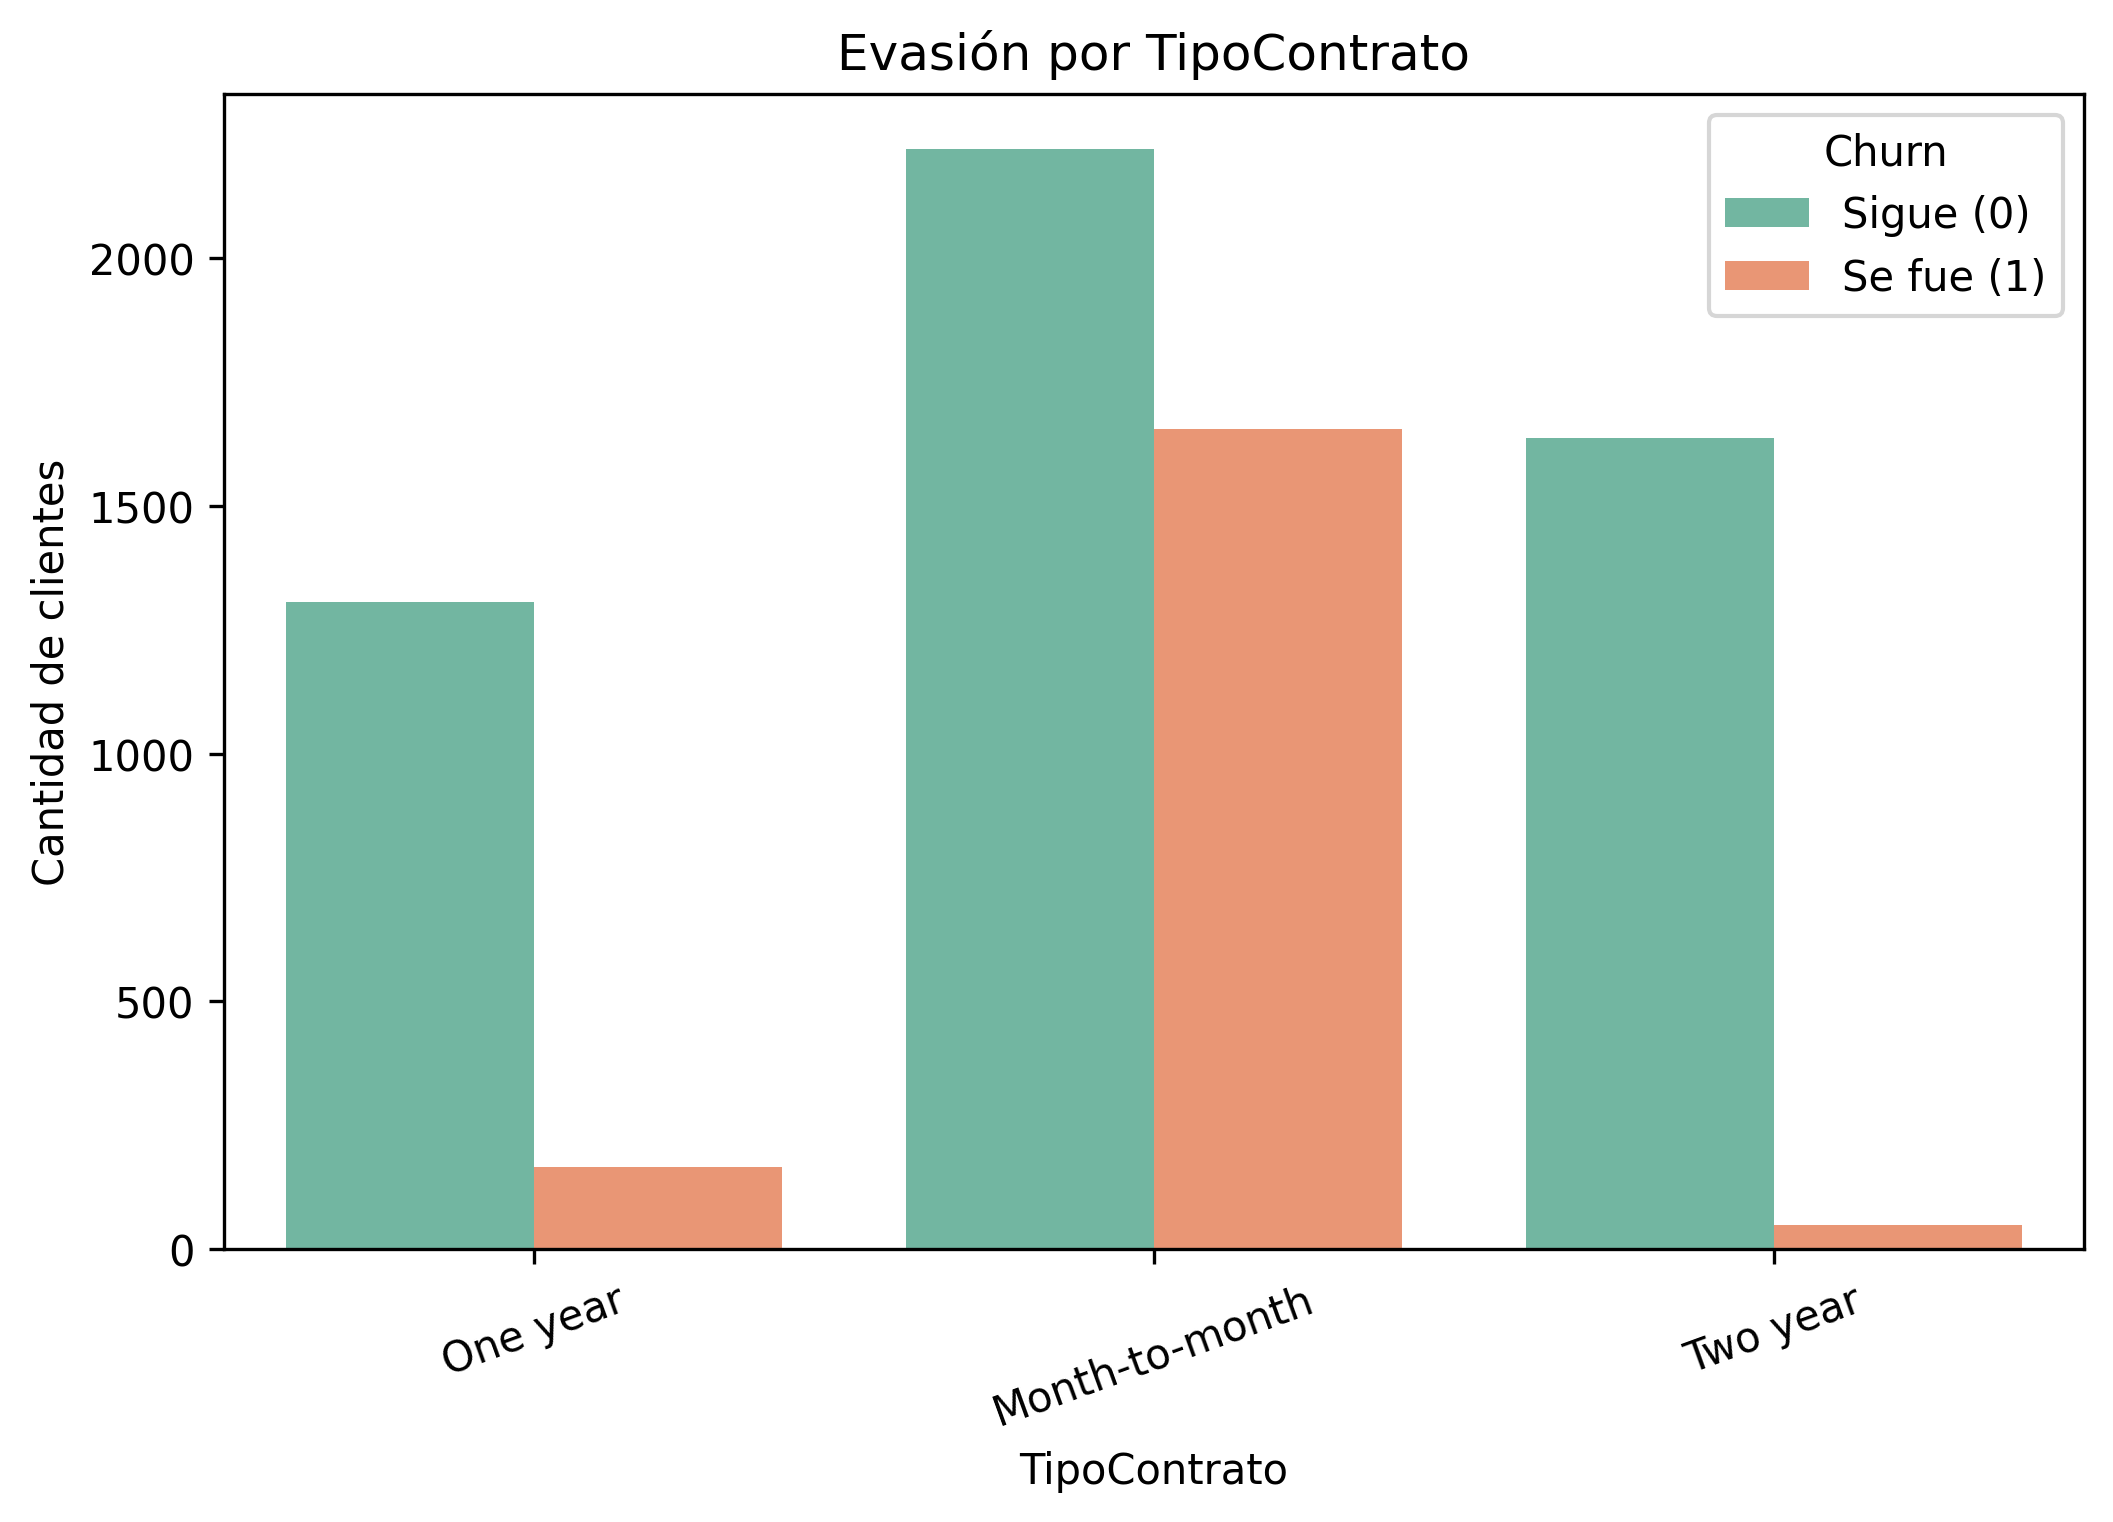

In [168]:
Tipo_de_contrato

Los clientes con metodos de pago automáticos tienen un menor Churn.

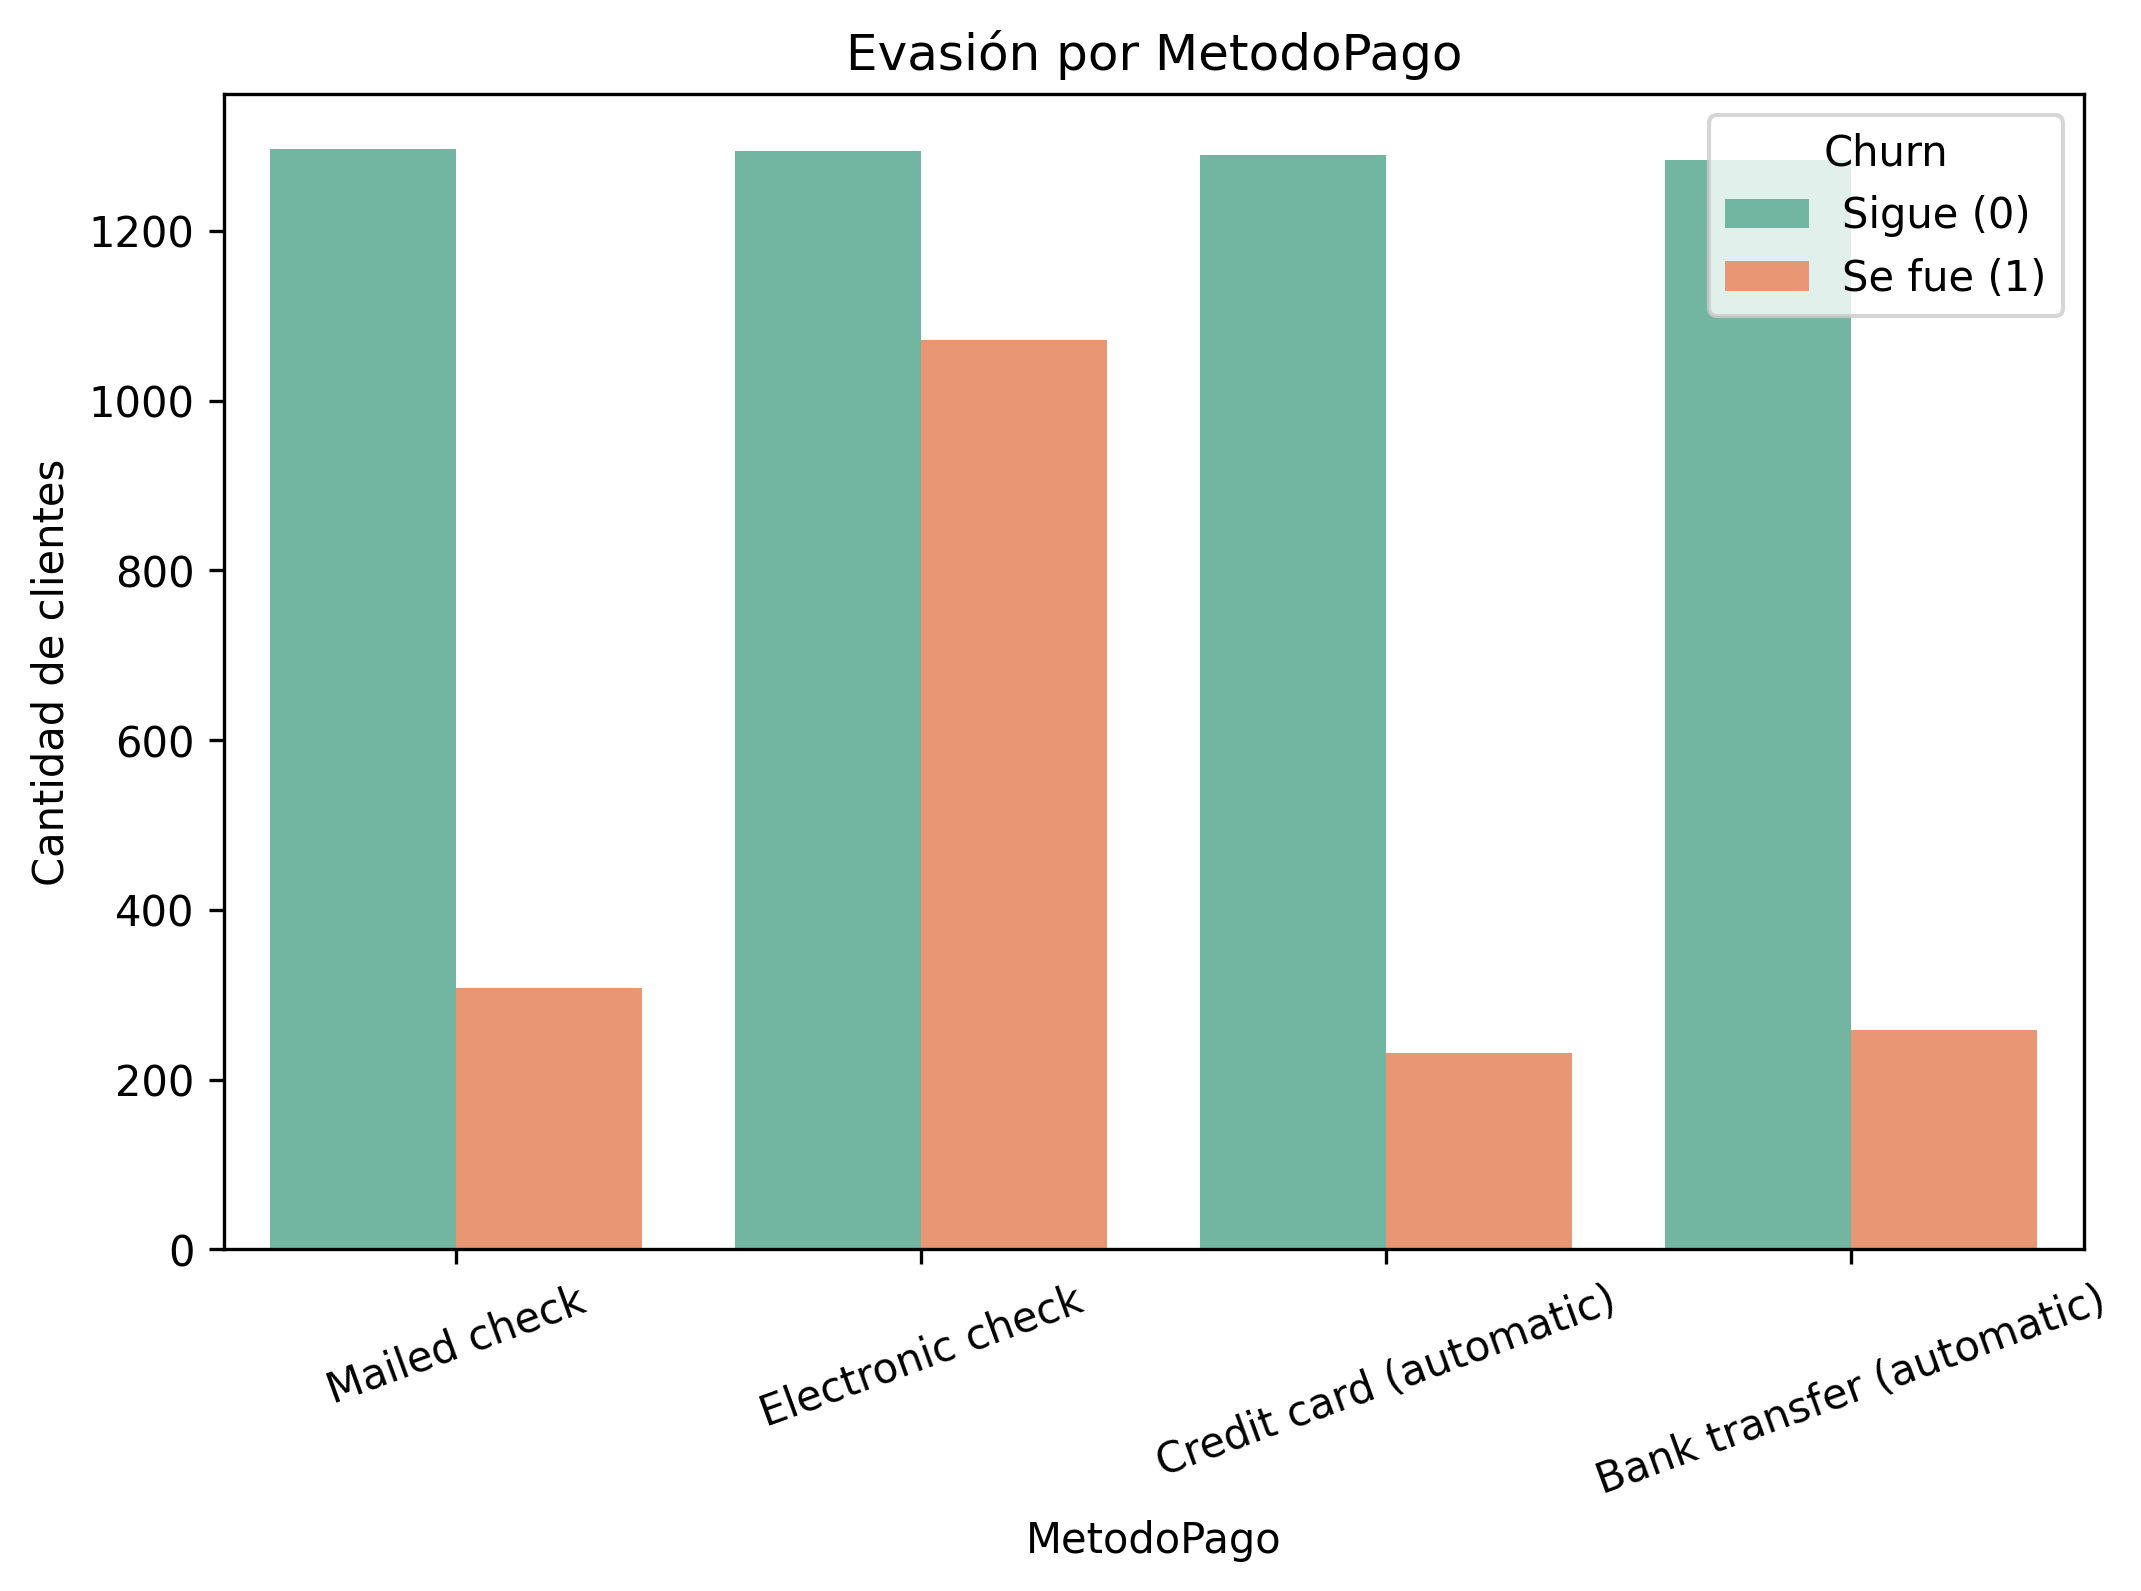

In [169]:
Tipo_de_pago

Los clientes que tienen un mayor gasto acumulado tienen mayor permanencia que los que tienen poco gasto cumulado.

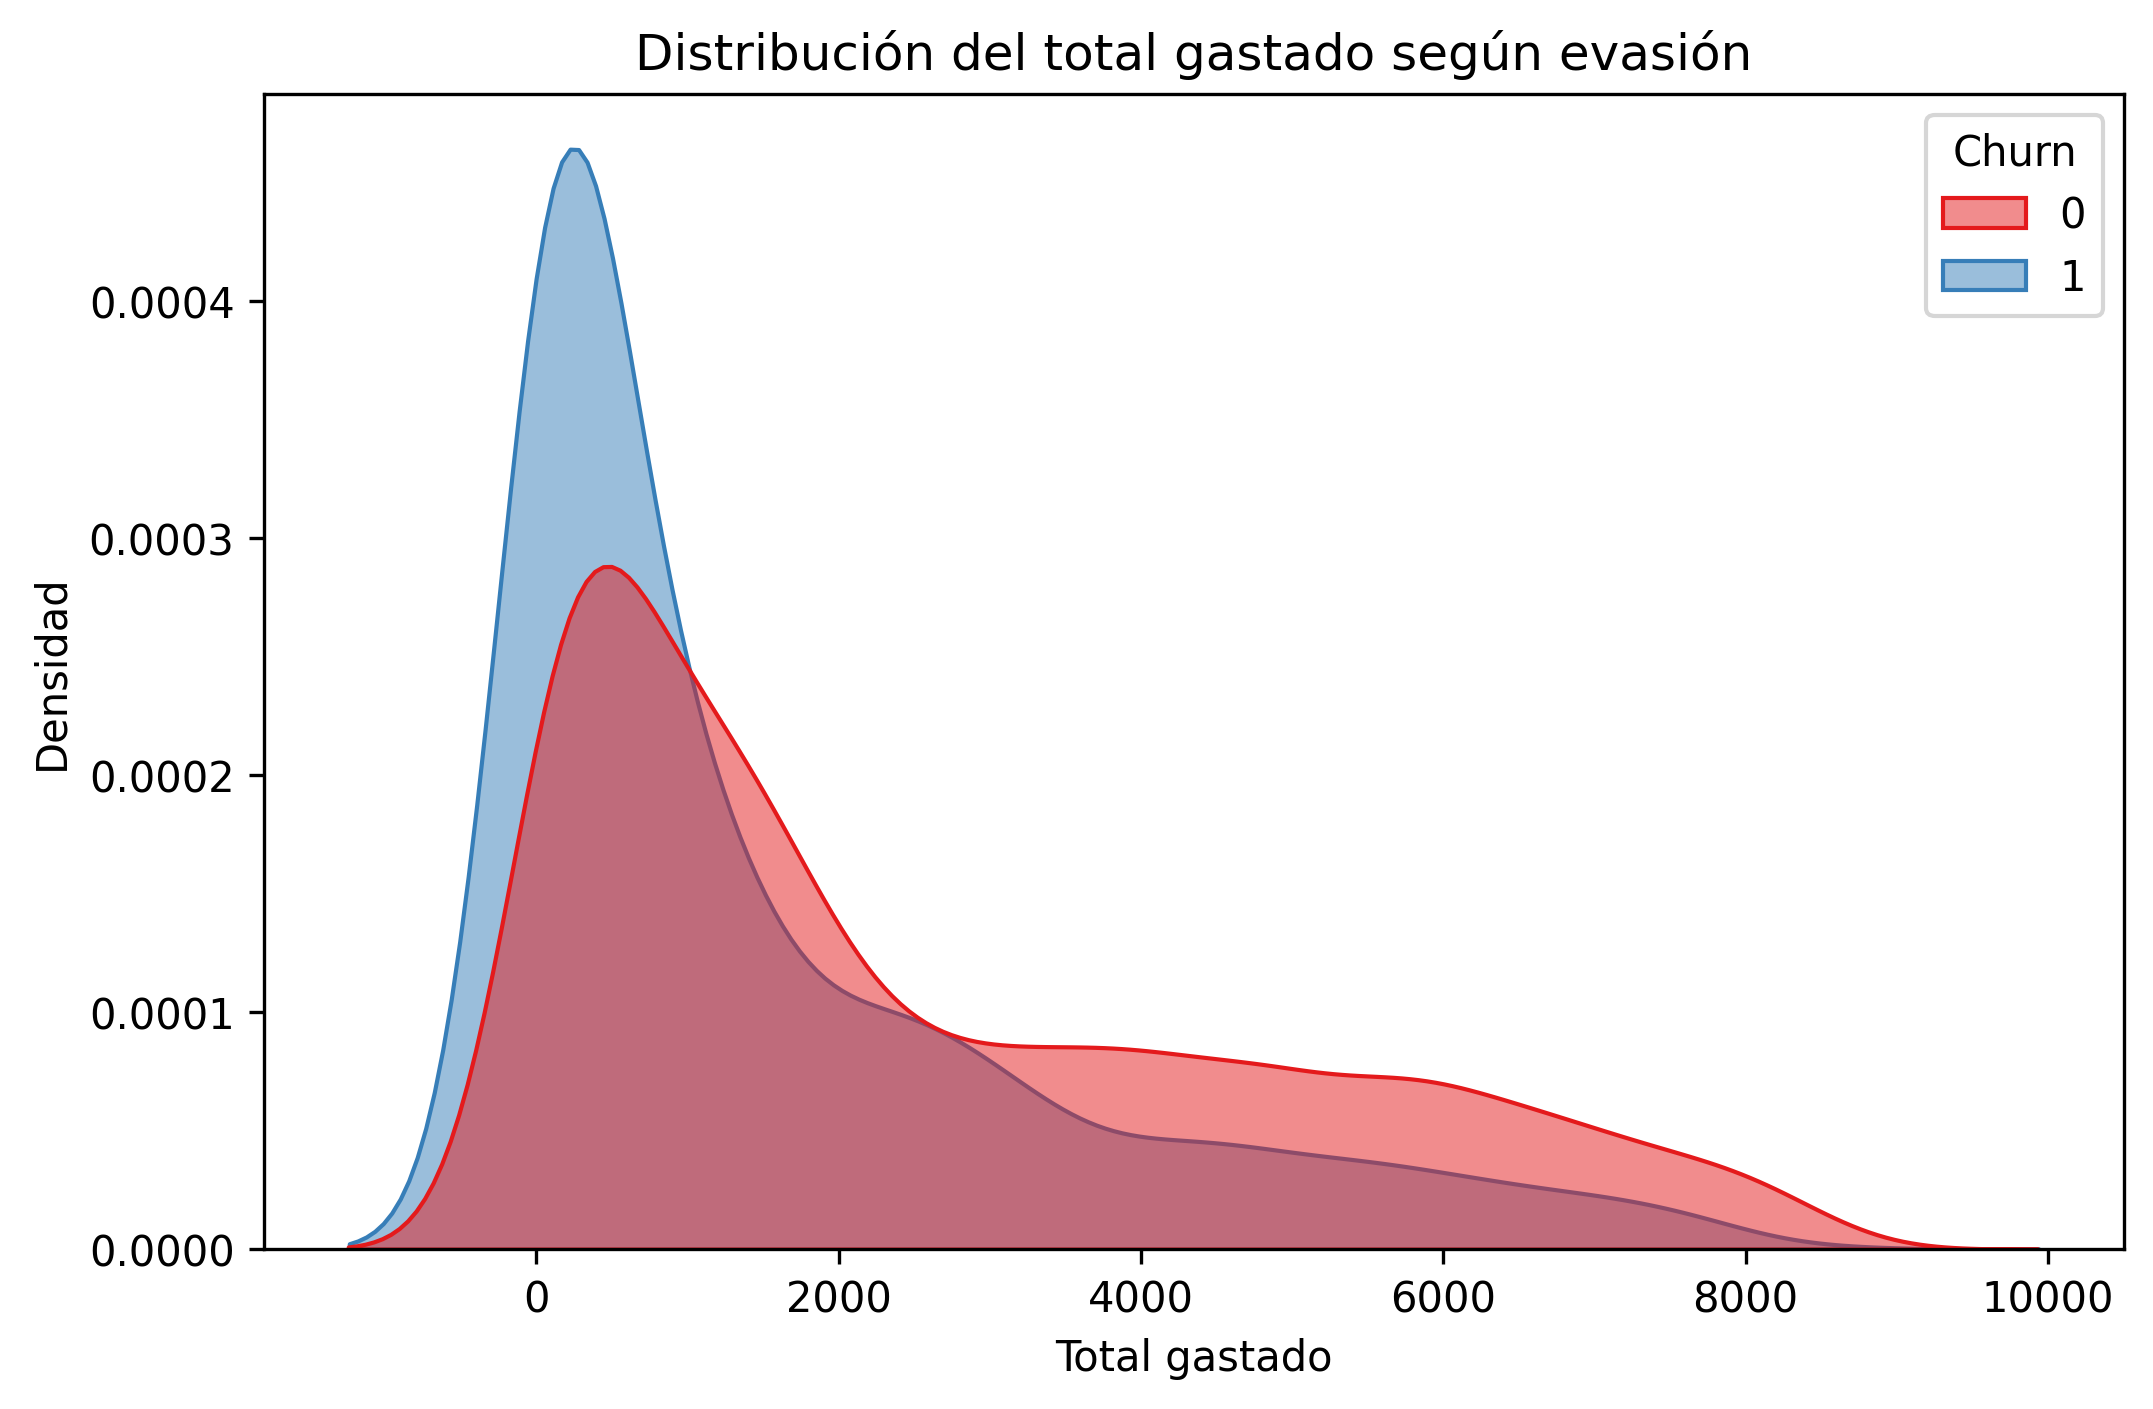

In [170]:
Total_gastado

# Recomendaciones
Ofrecer algunos beneficios por contar con contratos de mayor duración.\
Incentivar los metodos de pago automáticos.\
Tener campañas personalizadas para clietnes según el rang de permanencia.